<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JSOrtegaB/blob/main/Actividad_Semanal_6_Visualizacion_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 6, visualización

## Ciencia y analítica de datos

### Profesor:  María de la Paz Rico Fernández

###Juan Sebastian Ortega Briones A01794327

Se importan las dependencias

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import array as arr
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

Se lee el archivo de datos

In [228]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

## Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

[Descripción de los datos](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt)

In [229]:
pd.set_option("display.max_columns", 25)
df.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [230]:
df.shape

(30000, 25)

In [231]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [232]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [234]:
df[df.isna().any(axis=1)].head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
18,19,360000,2.0,1.0,1.0,49.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,39,50000,1.0,1.0,2.0,25.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,780.0,0.0,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0,1.0
49,50,20000,1.0,1.0,2.0,24.0,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0.0
64,65,130000,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0,0.0
160,161,30000,1.0,1.0,2.0,41.0,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0,0.0


## Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [235]:
df.dropna(inplace=True)                     #Al ser pocas filas que contienen datos nulos voy a borrar todas las filas que contienen nan
df.reset_index(drop=True, inplace=True)     #Resetea el indice por las filas que se borraron
df.shape


(29958, 25)

## Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [236]:
ndf=df.loc[:,'X12':'X23']
ndf.insert(0, 'X5',df.X5)
ndf
ndf.describe().round(2)  # Estadísticas de variables no categoricas


,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00,29958.00
mean,35.48,51248.12,49200.49,47032.39,43279.34,40328.98,38889.93,5664.61,5925.72,5228.43,4829.87,4801.48,5220.71
std,9.21,73674.95,71211.23,69385.24,64364.68,60826.22,59582.88,16568.82,23055.98,17617.34,15676.21,15285.55,17788.98
min,21.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28.00,3559.25,2984.00,2664.75,2327.50,1762.25,1256.00,1000.00,835.25,390.00,296.25,253.25,118.00
50%,34.00,22379.00,21194.50,20085.50,19037.50,18104.50,17067.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,41.00,67190.00,64027.75,60183.00,54551.25,50220.75,49234.75,5007.00,5000.00,4511.50,4014.75,4040.00,4000.00
max,79.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


X5 (Edad): Está dispersa con una media de 35 años en todo el rango aunque esta más inclinada al lado izquierdo en el cuarto cuartíl.
X6-X11 (historial de pago): 

X12 a X17 (Monto del saldo historico de 6 meses):  en notorio que la tendencia central baja con respecto al tiempo, la dispersión es alta para los saldos

X18 a X23 (pago historico de 6 meses):  la tendencia central en el pago mensual es constante con gran dispersión

X6 al X11 (historial de pagos de 6 meses) al ser categóricas, hago un conteo de los valores en grupos para entender mejor el comportamiento, no muestran cambios importantes a lo largo del tiempo   (este analisis viene del conteo de variables categóricas, abajo)



## Conteo de variables categóricas

In [237]:
group_names = ['Sin Atrasos', 'Poco Atraso', 'Mucho Atraso']
bins = [-2,1,4,8]  
dfX6=pd.cut(df.X6, bins, labels=group_names, include_lowest=True )
dfX7=pd.cut(df.X7, bins, labels=group_names, include_lowest=True )
dfX8=pd.cut(df.X8, bins, labels=group_names, include_lowest=True )
dfX9=pd.cut(df.X9, bins, labels=group_names, include_lowest=True )
dfX10=pd.cut(df.X10, bins, labels=group_names, include_lowest=True )
dfX11=pd.cut(df.X11, bins, labels=group_names, include_lowest=True )


print(dfX6.value_counts(sort=True, normalize=True))
print(dfX7.value_counts(sort=True, normalize=True))
print(dfX8.value_counts(sort=True, normalize=True))
print(dfX9.value_counts(sort=True, normalize=True))
print(dfX10.value_counts(sort=True, normalize=True))
print(dfX11.value_counts(sort=True, normalize=True))


Sin Atrasos     0.895687
Poco Atraso     0.102143
Mucho Atraso    0.002170
Name: X6, dtype: float64
Sin Atrasos     0.853094
Poco Atraso     0.144970
Mucho Atraso    0.001936
Name: X7, dtype: float64
Sin Atrasos     0.859804
Poco Atraso     0.137760
Mucho Atraso    0.002437
Name: X8, dtype: float64
Sin Atrasos     0.883136
Poco Atraso     0.113559
Mucho Atraso    0.003305
Name: X9, dtype: float64
Sin Atrasos     0.901228
Poco Atraso     0.096135
Mucho Atraso    0.002637
Name: X10, dtype: float64
Sin Atrasos     0.897490
Poco Atraso     0.099873
Mucho Atraso    0.002637
Name: X11, dtype: float64


Las varables categoricas desctitas en la informacion del encabezado son de X2 a X4.



In [238]:
genero_dic={1:"Hombre", 2:"Mujer"}
df_categorical=df.iloc[:,2:5].astype('int64')         #Cambio de tipode variable por ser categorica, las separamos porque estas no las vamos a normalizar  
df_categorical['X2'].value_counts().rename(index=genero_dic)


Mujer     18095
Hombre    11863
Name: X2, dtype: int64

In [239]:
educacion_dic={1:"graduado", 2:"universidad", 3:"preparatoria", 4:"otro"}
df_categorical['X3'].value_counts().rename(index=educacion_dic)

universidad     14009
graduado        10572
preparatoria     4909
5                 280
otro              123
6                  51
0                  14
Name: X3, dtype: int64

In [240]:
estado_civil_dic={1:"casado", 2:"soltero", 3:"otro"}
df_categorical['X4'].value_counts().rename(index=estado_civil_dic)

soltero    15939
casado     13643
otro         322
0             54
Name: X4, dtype: int64

## Normalizando los datos

In [241]:
scaled = preprocessing.scale(df.drop(['ID','Y'], axis=1))
#x_scaled = scaler.fit_transform(df.drop(['ID','Y'], axis=1))   # escala los datos a los que les quitamos la variable de salida y el identificador ID
X=pd.DataFrame(scaled , columns=df.drop(['ID','Y'], axis=1).columns)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


## Reduciendo las dimensiones

### Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [242]:
plt.style.use('ggplot')
# Z-score the features
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA() # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [243]:
X.shape

(29958, 23)

In [244]:
pesos_pca=pd.DataFrame(pca.explained_variance_ratio_*100).T
pesos_pca.columns=[f'PC{i + 1}' for i in range(X.shape[1])]
print('En porcentaje %')
pesos_pca


En porcentaje %


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,28.450627,17.816393,6.743106,6.398484,4.459814,4.161107,3.94719,3.859698,3.788275,3.404411,3.185979,2.965872,2.482428,2.280866,1.755079,1.129526,1.08342,0.82097,0.573511,0.30499,0.177337,0.109951,0.100963


**A partir de la componente 7 obtenemos mas del 70%**

## Visualización

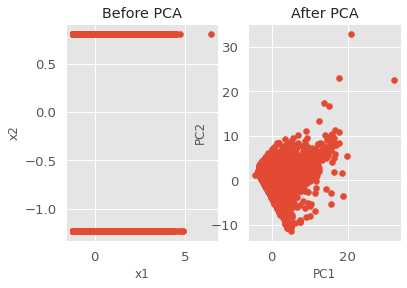

In [245]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

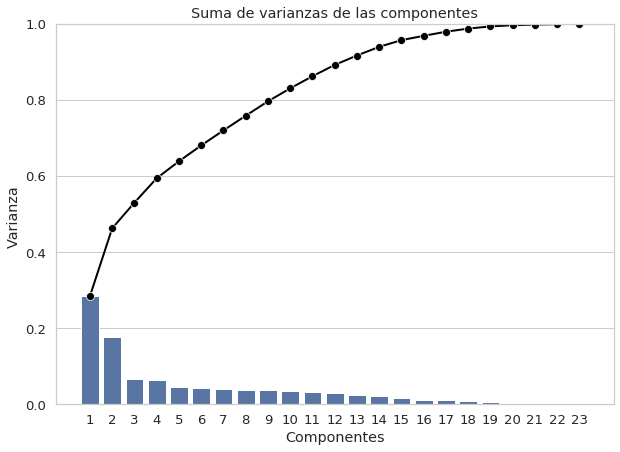

In [246]:
PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Suma de varianzas de las componentes')
plt.xlabel('Componentes')
plt.ylabel('Varianza ')
plt.ylim(0, 1)
plt.show()

## Histogramas

## Interpretación